# Exploratory Data Analysis

In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
sys.path.append('../scripts')
from data_loader import *
from eda import *

## Load Datasets

### Train Dataset

In [2]:
# path to the CSV file
filename = 'preprocessed_train_20240531_015454.parquet'
path = os.path.join('..', 'data/02_intermediate', filename)

# Load dataset
train_df = load_dataset(path)

In [17]:
train_df.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,344,7,2014-06-22,0,False,0,0,False,0,2,300.0,4.0,2011.0,True,14.000000,2011.000000,1,0
1,108,7,2013-11-17,0,False,0,0,False,3,2,2190.0,9.0,2003.0,False,23.269093,2011.752774,1,0
2,299,5,2013-09-06,749,True,0,0,False,3,2,38630.0,9.0,2012.0,False,23.269093,2011.752774,1,6244
3,402,5,2015-04-24,475,True,0,0,False,2,2,5830.0,9.0,2011.0,True,13.000000,2010.000000,1,4055
4,742,3,2014-06-18,1049,True,1,0,False,3,2,4380.0,8.0,2010.0,False,23.269093,2011.752774,1,9459


In [6]:
train_df['Promo'].unique()

array([0, 1], dtype=int64)

## Test dataset

In [18]:
# path to the CSV file
filename = 'formatted_test_df.parquet'
path = os.path.join('..', 'data/02_intermediate', filename)

# Load dataset
formatted_test_df = load_dataset(path)
formatted_test_df

Error: [Errno 2] No such file or directory: '..\\data/02_intermediate\\formatted_test_df.parquet'. The dataset file was not found.


## Explore Promo Distribution

Distribution of Promo in the training dataset:
Promo
0    629129
1    388080
Name: count, dtype: int64


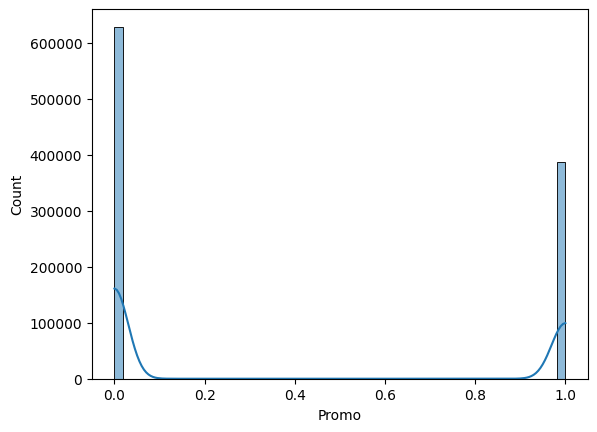

Distribution of Promo in the test dataset:
Promo
0    24824
1    16264
Name: count, dtype: int64


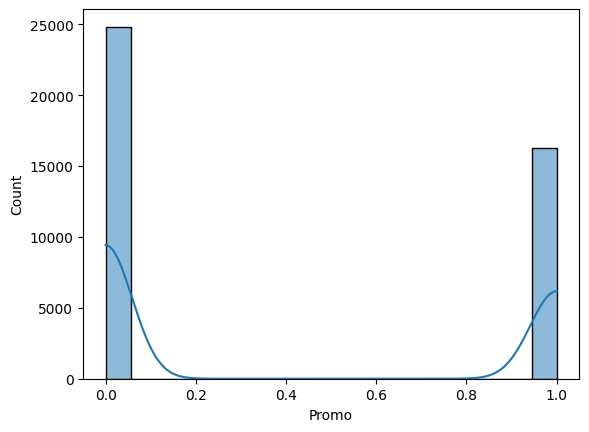

Comparing the distribution of Promo between the training and test datasets:


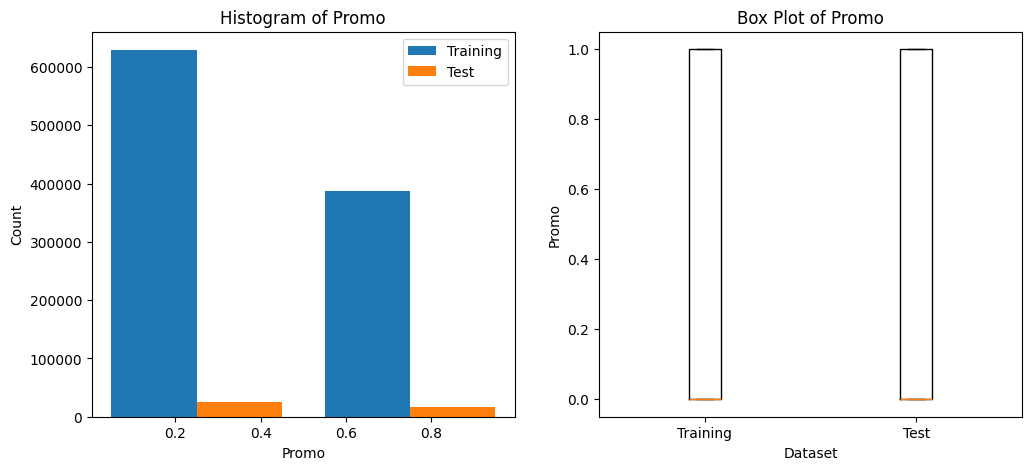

The distribution of Promo is not similar between the training and test datasets.


In [9]:
compare_promo_distribution(formatted_train_df,formatted_test_df)

## Analyze the sales behavior before, during, and after holidays.

Sales statistics by holiday type:
                     mean  median          std
StateHoliday                                  
0             5948.330409  5849.0  3769.111453
1              284.923682     0.0  1853.744774
2              210.826388     0.0  1805.905610
3              170.587364     0.0  1468.726352


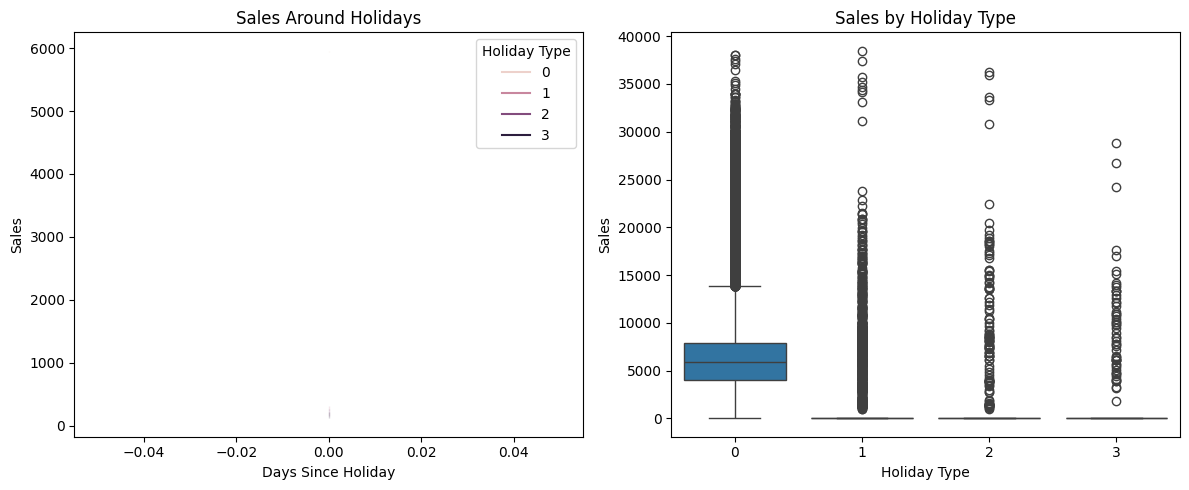

Observations:
Sales tend to be higher during state holidays.
No clear pattern in sales after state holidays.


In [3]:
analyze_sales_around_holidays(train_df)

## Analyze seasonal purchase behaviors in the data

<Figure size 1200x800 with 0 Axes>

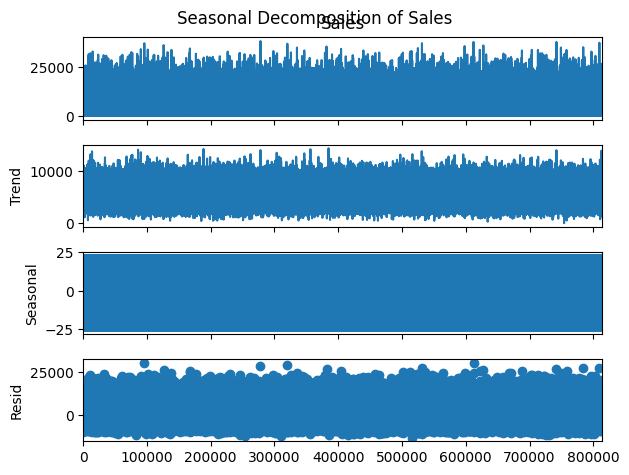

Observations:
Sales appear to be higher during periods without Promo2.
There are clear seasonal patterns in sales.


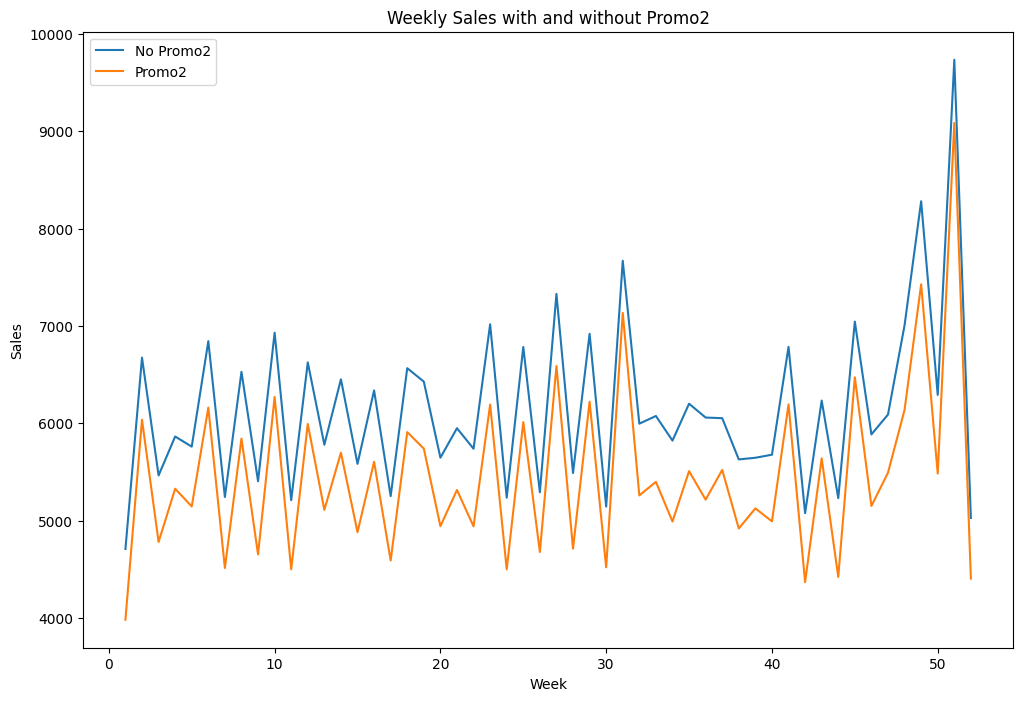

In [3]:
analyze_seasonal_purchases(train_df)

## Analyze the correlation between sales and the number of customers

Correlation coefficient between Sales and Customers: 0.89


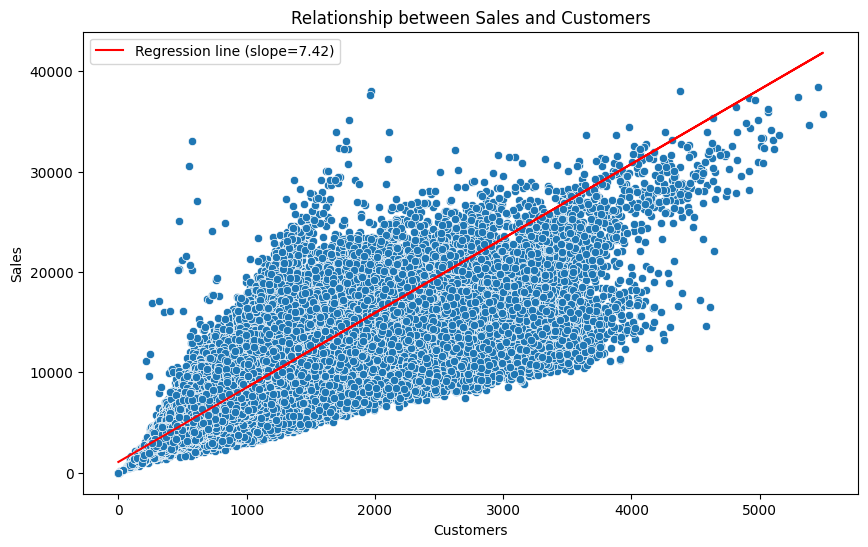

Implications for the sales forecasting model:
The positive correlation between sales and the number of customers suggests that the sales forecasting model should incorporate the customer count as a feature. This could improve the model's ability to predict sales accurately.


In [4]:
analyze_sales_customers_correlation(train_df)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813767 entries, 0 to 813766
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      813767 non-null  int64         
 1   DayOfWeek                  813767 non-null  int64         
 2   Date                       813767 non-null  datetime64[ns]
 3   Customers                  813767 non-null  int64         
 4   Open                       813767 non-null  bool          
 5   Promo                      813767 non-null  int64         
 6   StateHoliday               813767 non-null  int32         
 7   SchoolHoliday              813767 non-null  bool          
 8   StoreType                  813767 non-null  int32         
 9   Assortment                 813767 non-null  int32         
 10  CompetitionDistance        813767 non-null  float64       
 11  CompetitionOpenSinceMonth  813767 non-null  float64 

## Analyzing the impact of promotions on sales and customers

In [7]:
# Assuming 'df' is your original DataFrame
train_df['New Customers'] = train_df[train_df['Promo'] == 1]['Customers'] - train_df[train_df['Promo'] == 0]['Customers']

In [4]:
# Group the data by Promo and calculate the total number of customers
promo_group = train_df.groupby('Promo')['Customers'].sum().reset_index()

# Print the total customers for each Promo group
print("Total customers by Promo group:")
for _, row in promo_group.iterrows():
    promo = row['Promo']
    total_customers = row['Customers']
    print(f"Promo = {promo}: {total_customers}")

Total customers by Promo group:
Promo = 0: 260603450
Promo = 1: 254647622


In [9]:
train_df['New Customers'].unique()

array([nan])

In [5]:
# path to the CSV file
filename = 'train.csv'
path = os.path.join('..', 'data/01_raw', filename)

# Load dataset
train_df2 = load_dataset(path)
train_df.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,344,7,2014-06-22,0,False,0,0,False,0,2,300.0,4.0,2011.0,True,14.000000,2011.000000,0,0
1,108,7,2013-11-17,0,False,0,0,False,3,2,2190.0,9.0,2003.0,False,23.269093,2011.752774,-1,0
2,299,5,2013-09-06,749,True,0,0,False,3,2,38630.0,9.0,2012.0,False,23.269093,2011.752774,-1,6244
3,402,5,2015-04-24,475,True,0,0,False,2,2,5830.0,9.0,2011.0,True,13.000000,2010.000000,0,4055
4,742,3,2014-06-18,1049,True,1,0,False,3,2,4380.0,8.0,2010.0,False,23.269093,2011.752774,-1,9459


In [6]:
analyze_promo_impact(train_df2)

New customers during promotions: -7513859

Impact on new and existing customers:
Average increase in new customers during promotions: -7513859.00
Average number of existing customers without promotions: 517.82
Summary statistics by Promo:
             Sales                        Customers                    
              mean          std   count        mean         std   count
Promo                                                                  
0      4406.050805  3442.450020  629129  517.823542  452.881419  629129
1      7991.152046  3419.025495  388080  820.098815  419.897191  388080

T-test for Sales: t-statistic=511.55, p-value=0.0000
ANOVA for Sales: F-statistic=261680.52, p-value=0.0000
ANOVA for Customers: F-statistic=112976.71, p-value=0.0000


In [7]:
# Group the data by Promo and calculate the total number of customers
promo_group = train_df2.groupby('Promo')['Customers'].sum().reset_index()

# Print the total customers for each Promo group
print("Total customers by Promo group:")
for _, row in promo_group.iterrows():
    promo = row['Promo']
    total_customers = row['Customers']
    print(f"Promo = {promo}: {total_customers}")

Total customers by Promo group:
Promo = 0: 325777807
Promo = 1: 318263948


## Investigating the relationship between Promo, Sales etc..
Investigate the relationship between Promo, Sales, and other relevant features
to identify more effective ways of deploying promotions.

In [5]:
optimize_promo_deployment(train_df)

Correlation matrix:
                              Store  DayOfWeek      Date  Customers      Open  \
Store                      1.000000   0.000155  0.000566   0.024652  0.000114   
DayOfWeek                  0.000155   1.000000 -0.000501  -0.386176 -0.529249   
Date                       0.000566  -0.000501  1.000000   0.012859 -0.000329   
Customers                  0.024652  -0.386176  0.012859   1.000000  0.616736   
Open                       0.000114  -0.529249 -0.000329   0.616736  1.000000   
Promo                      0.000907  -0.392517  0.017329   0.316572  0.295153   
StateHoliday              -0.000262  -0.043897  0.008209  -0.204437 -0.340898   
SchoolHoliday              0.000177  -0.205682  0.000214   0.071994  0.086536   
StoreType                 -0.021206   0.000711 -0.004512  -0.142005 -0.003076   
Assortment                 0.003589   0.000044  0.004206   0.006852  0.003323   
CompetitionDistance       -0.026301   0.000393  0.000859  -0.102658  0.008536   
Competit

None

## Analyzing the trends in customer behavior and sales during store opening and closing times.

Impact of store opening and closing on customer behavior and sales:
Open stores:
       Customers        Sales
mean  762.663777  6955.720203
std   401.110587  3106.170462

Closed stores:
      Customers  Sales
mean        0.0    0.0
std         0.0    0.0

Visualizing trends in Customers and Sales over time:


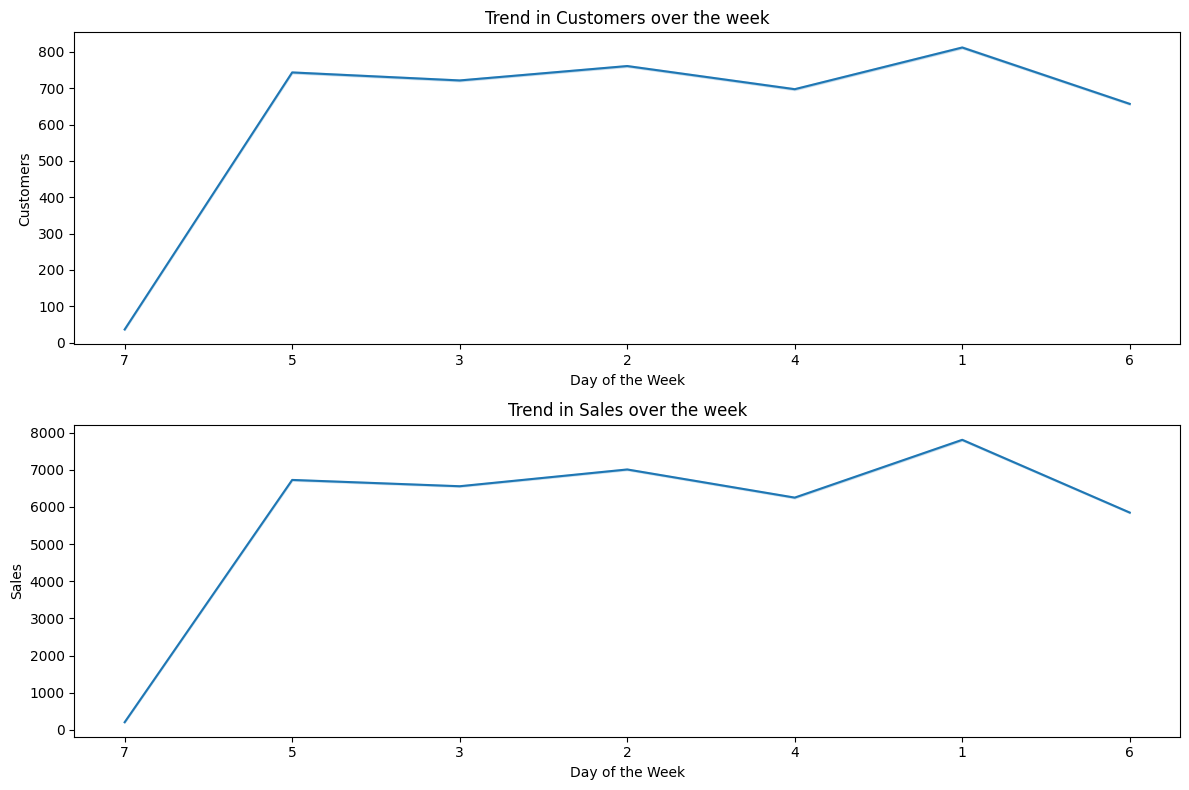


Insights for sales forecasting:
- Stores tend to have more customers when they are open compared to when they are closed.
- Stores tend to have higher sales when they are open compared to when they are closed.
- Customers and sales exhibit distinct trends over the course of the week, which could be useful for sales forecasting.


In [9]:
analyze_store_hours(train_df)

## Identifying the stores that are open on all weekdays and analyze the impact on their weekend sales.

Stores open on all weekdays: []
Average weekend sales for stores open on all weekdays: nan
Average weekend sales for other stores: nan


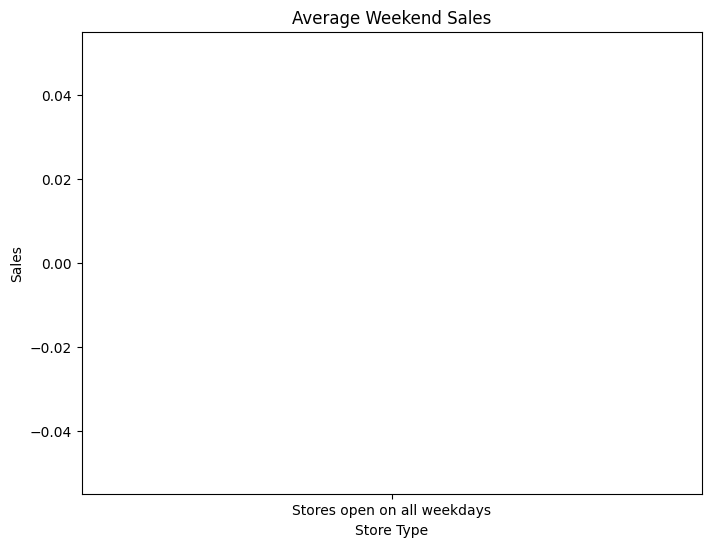

In [10]:
analyze_weekday_openings(train_df)

## Analyze the relationship between assortment type and sales

Summary statistics of sales by assortment type:
                   mean  median          std  min    max
Assortment                                              
0           5482.422961  5463.0  3685.674884    0  38484
1           8537.546709  8014.5  3866.050416    0  22137
2           6060.401872  6040.0  3992.458702    0  38037

ANOVA test results:
F-statistic: 4012.70
p-value: 0.0000

Tukey's HSD post-hoc test results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      1  3055.1237   0.0   2943.676  3166.5715   True
     0      2   577.9789   0.0   557.9405   598.0173   True
     1      2 -2477.1448   0.0 -2588.7129 -2365.5768   True
-----------------------------------------------------------


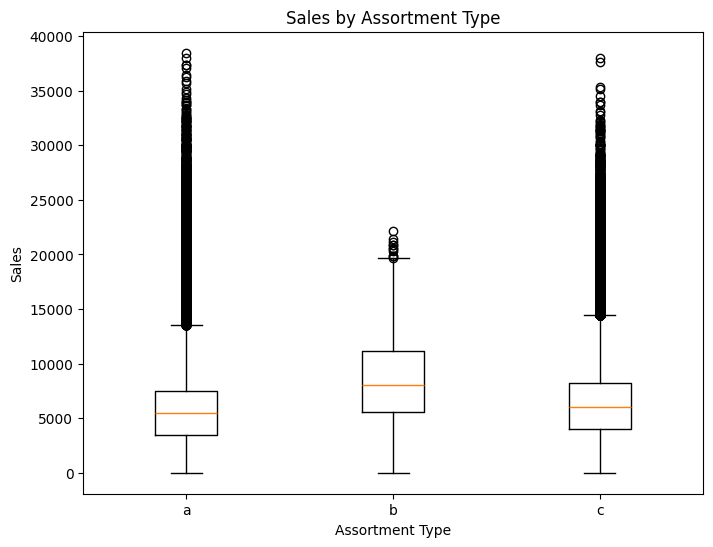

In [3]:
analyze_assortment_sales(train_df)

##  Analyze the relationship between competition distance and sales

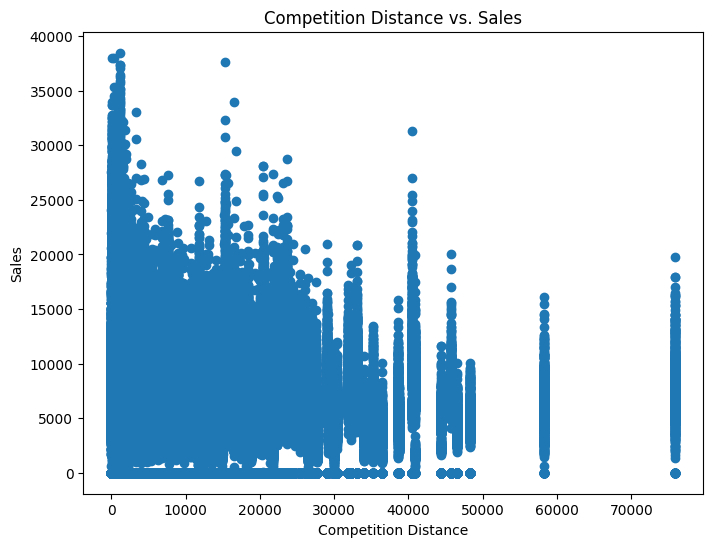

Pearson correlation coefficient: -0.02
p-value: 0.0000
Regression coefficient: -0.01
Intercept: 5826.63

Store Type '0':
Pearson correlation coefficient: -0.02
p-value: 0.0000

Store Type '3':
Pearson correlation coefficient: 0.02
p-value: 0.0000

Store Type '2':
Pearson correlation coefficient: 0.02
p-value: 0.0000

Store Type '1':
Pearson correlation coefficient: -0.26
p-value: 0.0000

Assortment '2':
Pearson correlation coefficient: -0.02
p-value: 0.0000

Assortment '0':
Pearson correlation coefficient: -0.04
p-value: 0.0000

Assortment '1':
Pearson correlation coefficient: -0.49
p-value: 0.0000


In [3]:
analyze_competition_distance_and_sales(train_df)

In [4]:
analyze_new_competitors(train_df)